In [1]:
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import missingno as msno 
import streamlit as st 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100



In [2]:
df = pd.read_csv("kc_house_data.csv")

<AxesSubplot:>

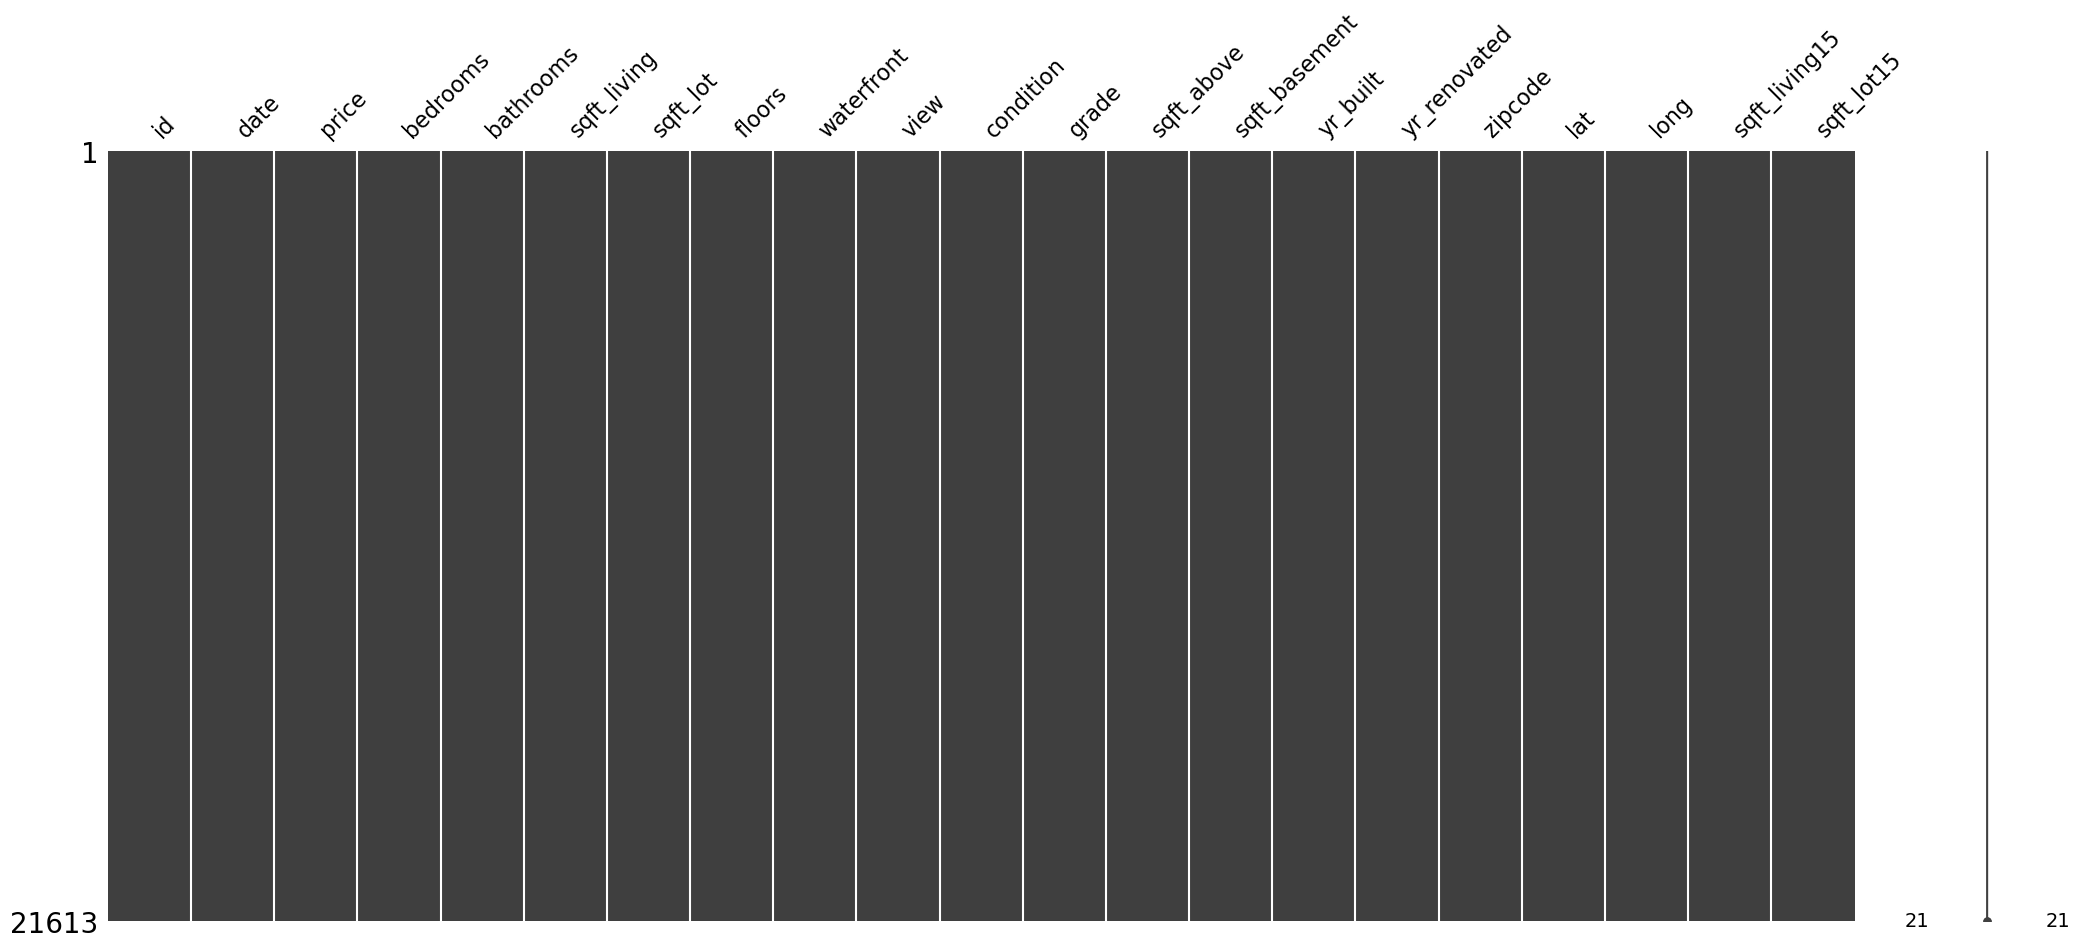

In [3]:
msno.matrix(df)

<AxesSubplot:xlabel='long', ylabel='lat'>

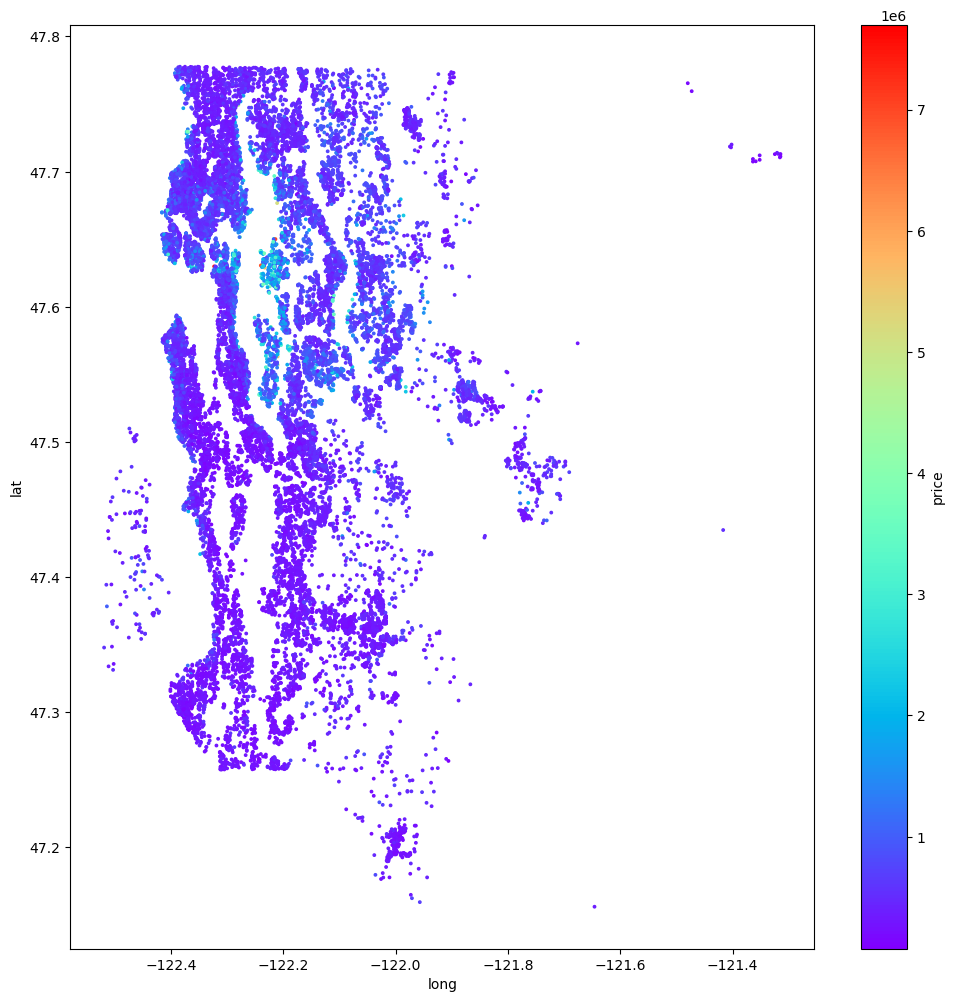

In [4]:
df.plot(kind="scatter", x="long", y="lat", c="price", cmap="rainbow", s=3, figsize=(12,12))

<AxesSubplot:xlabel='long', ylabel='lat'>

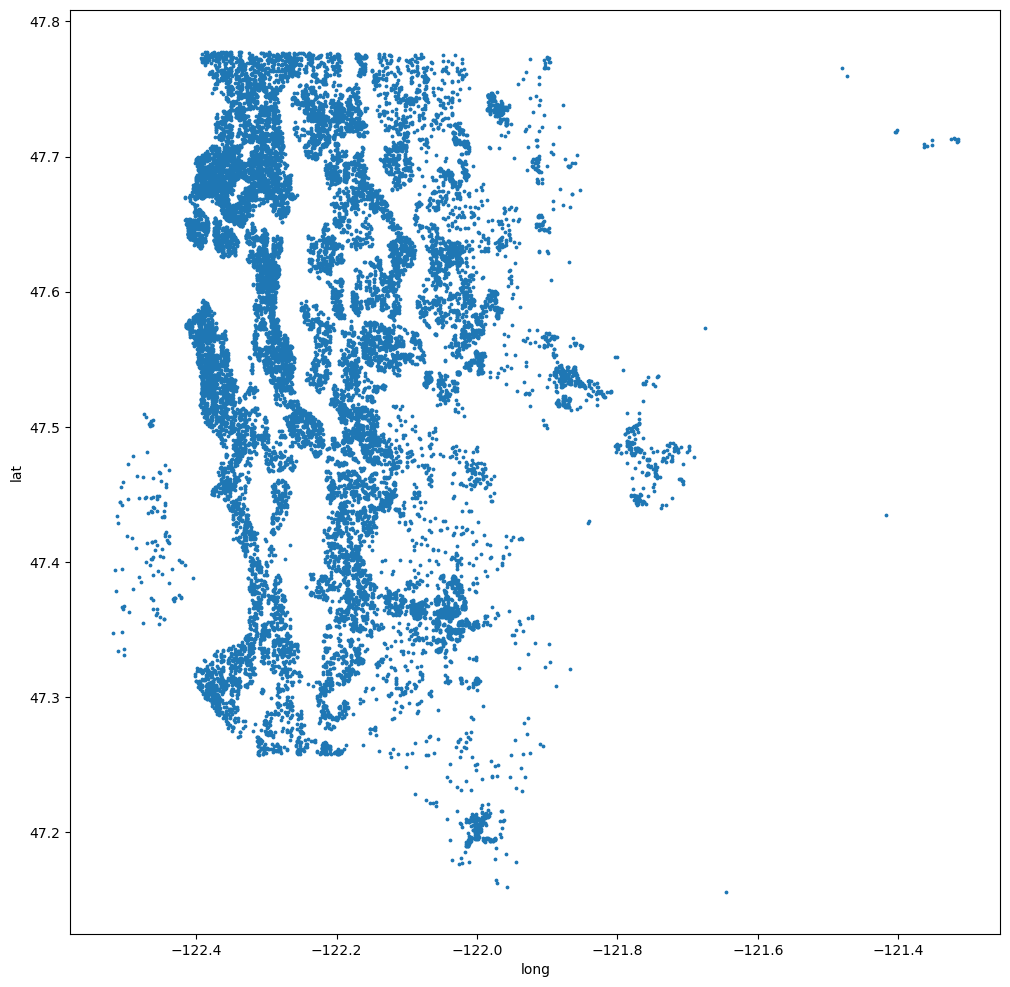

In [5]:
df.plot(kind="scatter", x="long", y="lat", cmap="rainbow", s=3, figsize=(12,12))

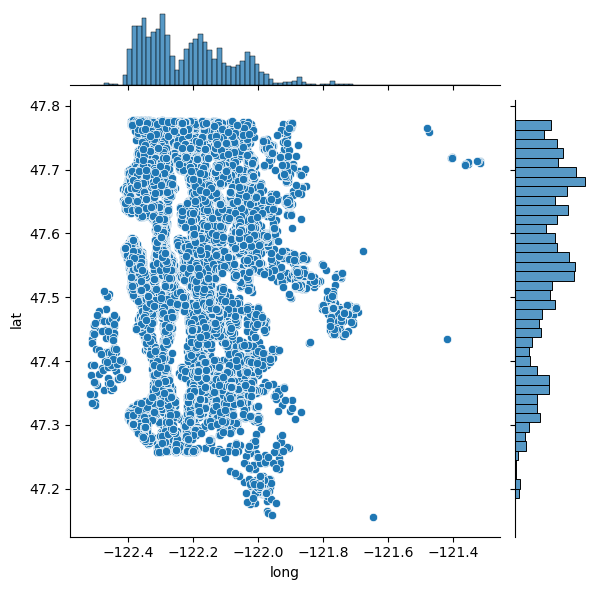

In [6]:
sns.jointplot(data=df, x="long", y="lat")

In [7]:
df = df.drop(['id','date'], axis=1)

In [8]:
df.groupby(['bedrooms']).mean()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,
0,4.095038e+05,0.826923,1707.846154,24141.307692,1.961538,0.000000,0.307692,2.846154,6.692308,1707.846154,0.000000,1983.846154,0.000000,98066.692308,47.511415,-122.150231,2036.923077,26097.076923
1,3.176429e+05,1.066583,884.613065,16285.673367,1.150754,0.025126,0.246231,3.266332,6.100503,823.859296,60.753769,1942.663317,169.638191,98103.417085,47.567169,-122.256854,1449.567839,14240.221106
2,4.013727e+05,1.401721,1239.752899,12096.726087,1.306703,0.011232,0.178623,3.377899,6.871739,1107.240942,132.511957,1955.413043,81.382609,98105.953623,47.588601,-122.278570,1503.785507,9693.109058
3,4.662321e+05,1.968394,1805.837235,14414.790208,1.449410,0.006515,0.187805,3.415513,7.472516,1584.442284,221.394951,1971.812602,76.001425,98076.478217,47.551478,-122.213344,1835.443506,12809.343648
4,6.354195e+05,2.436428,2554.649666,16720.793374,1.616100,0.005812,0.268091,3.406568,8.116681,2198.300639,356.349026,1976.594740,87.112467,98069.749201,47.556118,-122.189139,2291.124818,13727.256030
5,7.865998e+05,2.778576,3047.545284,16769.022486,1.579638,0.011868,0.409744,3.449094,8.272330,2407.566521,639.978763,1974.204872,101.061836,98070.188007,47.574169,-122.201242,2442.706433,13089.471580
6,8.255206e+05,3.068015,3284.341912,18586.930147,1.606618,0.014706,0.544118,3.470588,8.080882,2494.386029,789.955882,1963.036765,168.573529,98079.463235,47.580421,-122.240728,2280.176471,14756.878676
7,9.511847e+05,3.651316,3974.210526,20840.552632,1.723684,0.000000,0.500000,3.447368,8.447368,3160.263158,813.947368,1962.842105,210.657895,98085.815789,47.609024,-122.240711,2335.263158,15811.289474
8,1.105077e+06,3.557692,3800.000000,8971.615385,1.692308,0.000000,0.230769,3.538462,8.076923,2660.769231,1139.230769,1956.307692,0.000000,98081.846154,47.630008,-122.268769,2265.384615,7355.923077


In [9]:
df.loc[df['bedrooms'] > 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [10]:
df = df.assign(surface_liv = df.sqft_living * 0.092903)
df = df.assign(surface_above = df.sqft_above * 0.092903)
df = df.assign(surface_base = df.sqft_basement * 0.092903)
df = df.assign(surface_lot = df.sqft_lot * 0.092903)
df = df.assign(surface_liv15 = df.sqft_living15 * 0.092903)
df = df.assign(surface_lot15 = df.sqft_lot15 * 0.092903)

In [11]:
df.groupby(['surface_liv','price']).all()

,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface_above,surface_base,surface_lot,surface_liv15,surface_lot15
surface_liv,price,,,,,,,,,,,,,,,,,,,,,,,
26.941870,142000.0,False,False,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True
34.374110,276000.0,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True
35.303140,245000.0,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True
35.674752,265000.0,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True
36.232170,228000.0,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895.584920,4668000.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
918.810670,6885000.0,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True
932.746120,7062500.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [12]:
df.loc[df['surface_liv'] > 700]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface_liv,surface_above,surface_base,surface_lot,surface_liv15,surface_lot15
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,744.15303,556.48897,187.66406,4228.665851,318.65729,2488.685564
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,743.22400,624.30816,118.91584,2228.278455,427.35380,2020.640250
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,932.74612,713.49504,219.25108,3467.604475,365.10879,2364.288447
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,854.70760,575.99860,278.70900,3258.015307,330.73468,2261.723535
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1119.48115,796.17871,323.30244,2564.122800,366.03782,817.546400
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,895.58492,447.79246,447.79246,1214.056404,303.79281,971.207962
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,918.81067,823.12058,95.69009,2914.738722,421.77962,3969.745190
12777,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,1257.90662,874.21723,383.68939,28591.084056,450.57955,20234.273400
13411,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,732.07564,732.07564,0.00000,2252.897750,254.55422,999.729183
14032,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140,2840,20809,707.92086,555.55994,152.36092,2743.983008,263.84452,1933.218527


<AxesSubplot:>

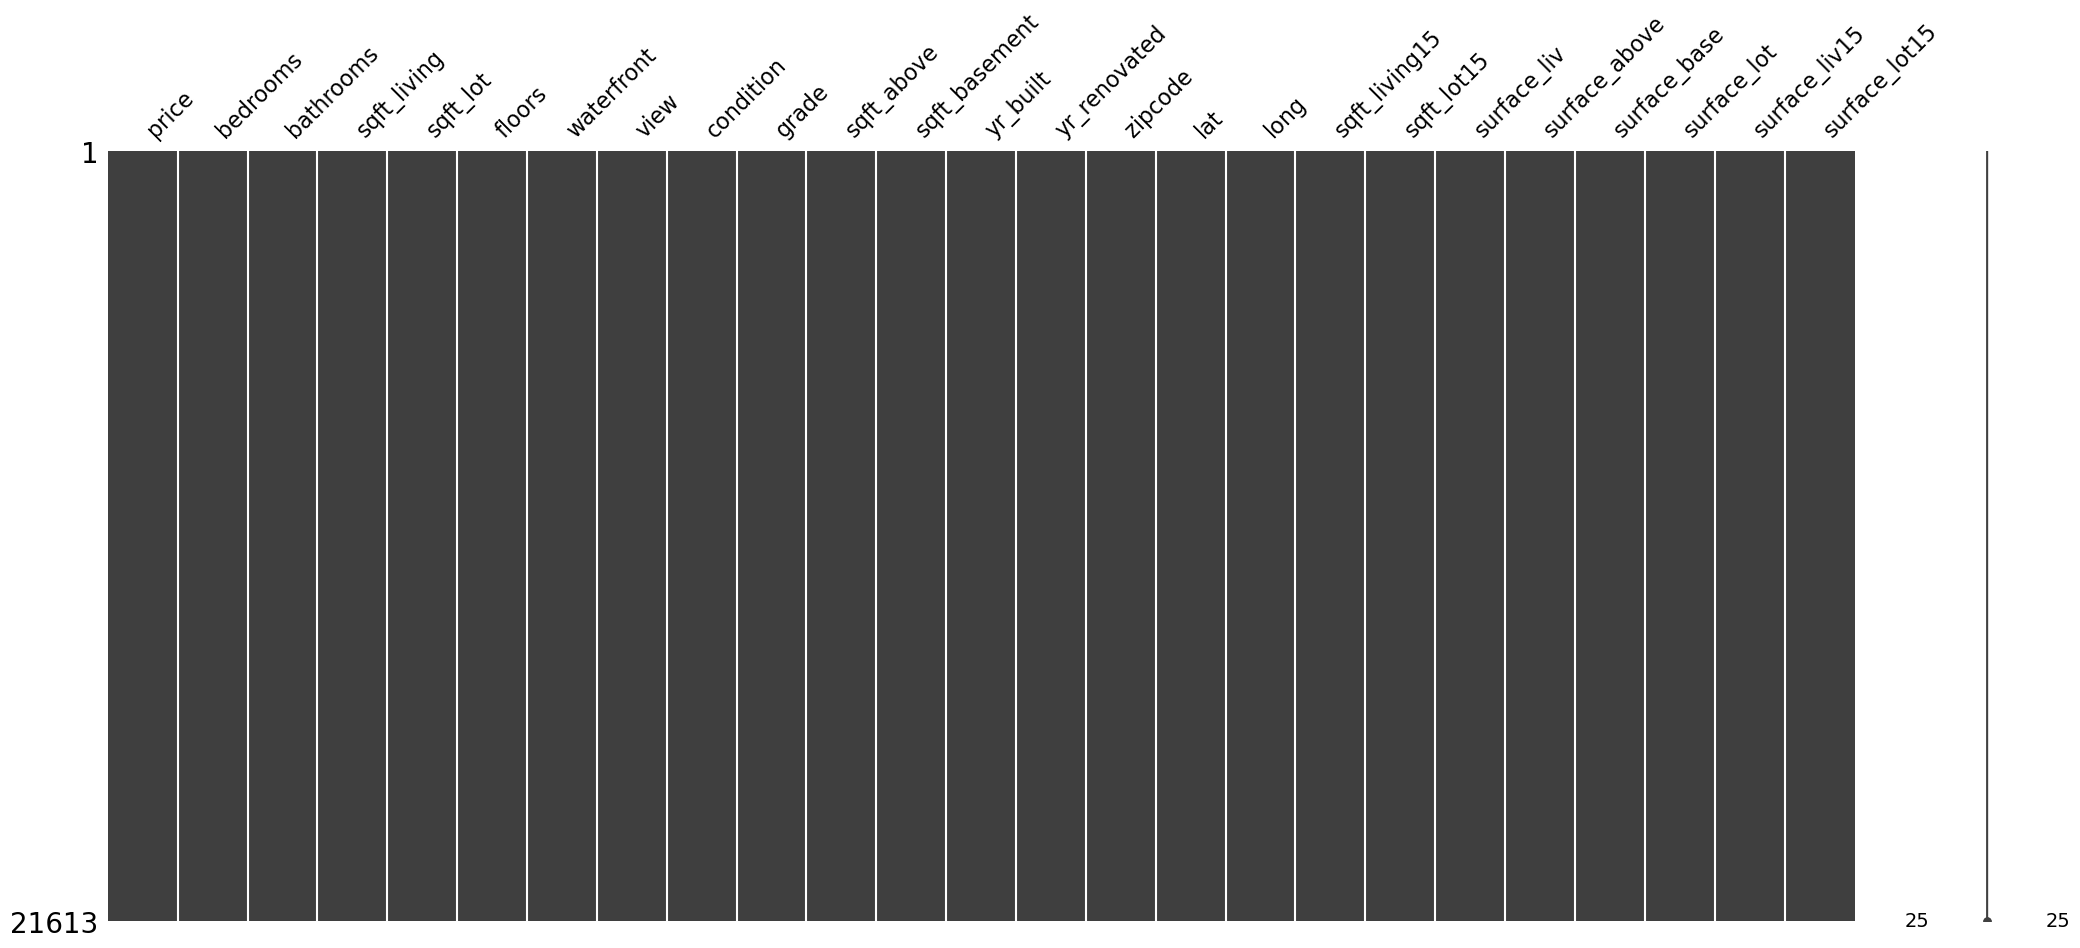

In [13]:
msno.matrix(df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

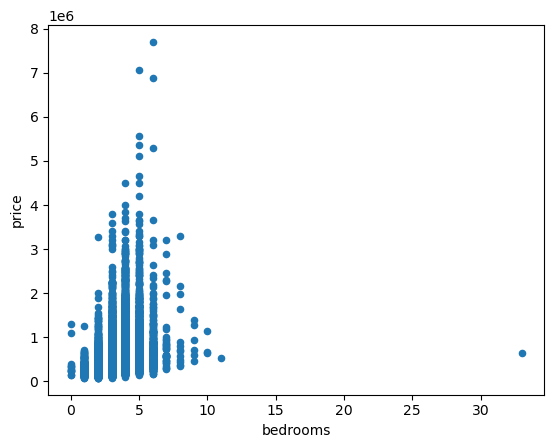

In [14]:
df.plot.scatter(x="bedrooms",y="price") 

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

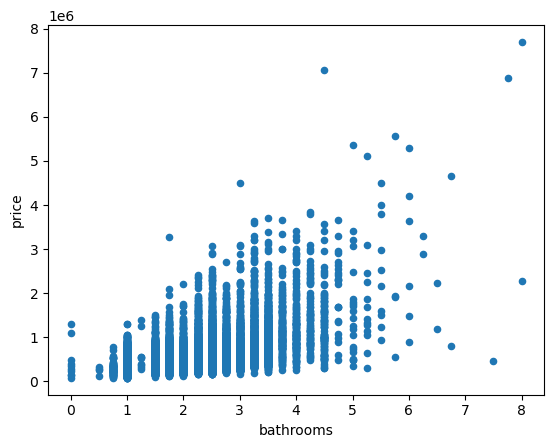

In [15]:
df.plot.scatter(x="bathrooms",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

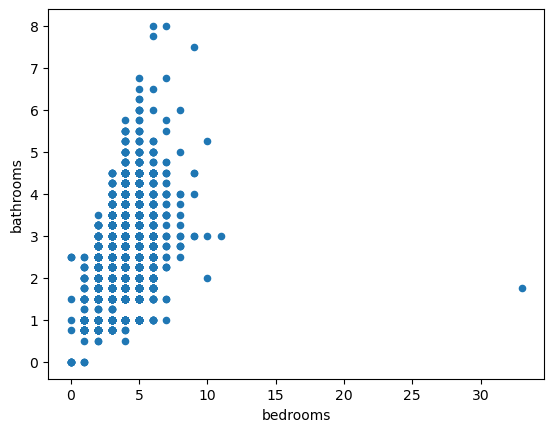

In [16]:
df.plot.scatter(x="bedrooms",y="bathrooms") 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

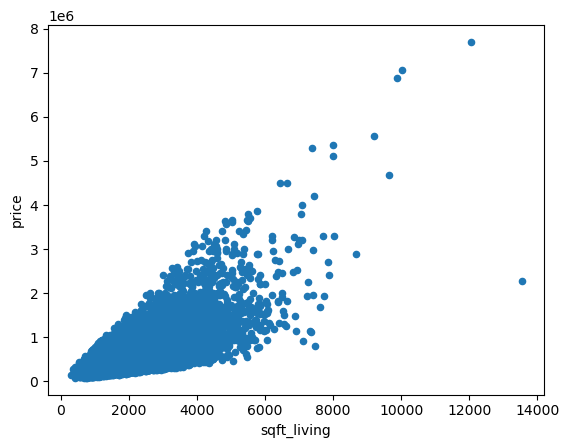

In [17]:
df.plot.scatter(x="sqft_living",y="price") 

<AxesSubplot:xlabel='view', ylabel='price'>

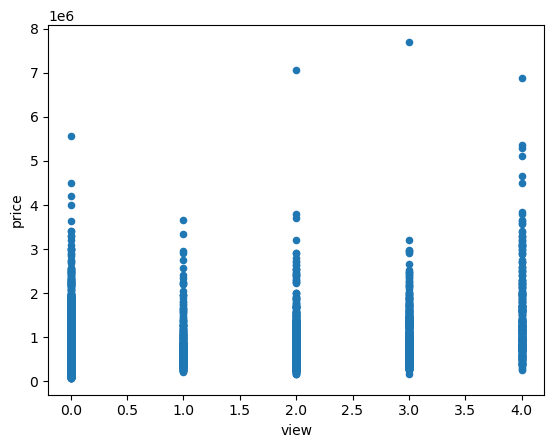

In [18]:
df.plot.scatter(x="view",y="price") 

In [19]:
df.rename(columns={"long": "Longitude", "lat": "Latitude"})

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Latitude,Longitude,sqft_living15,sqft_lot15,surface_liv,surface_above,surface_base,surface_lot,surface_liv15,surface_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554,109.62554,0.00000,524.901950,124.49002,524.901950
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.76071,201.59951,37.16120,672.803526,157.00607,709.686017
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531,71.53531,0.00000,929.030000,252.69616,748.983986
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988,97.54815,84.54173,464.515000,126.34808,464.515000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704,156.07704,0.00000,750.656240,167.22540,697.051209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,142.14159,142.14159,0.00000,105.073293,142.14159,140.190627
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,214.60593,214.60593,0.00000,540.045139,170.01249,668.901600
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,94.76106,94.76106,0.00000,125.419050,94.76106,186.456321
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,148.64480,148.64480,0.00000,221.852364,130.99323,119.566161


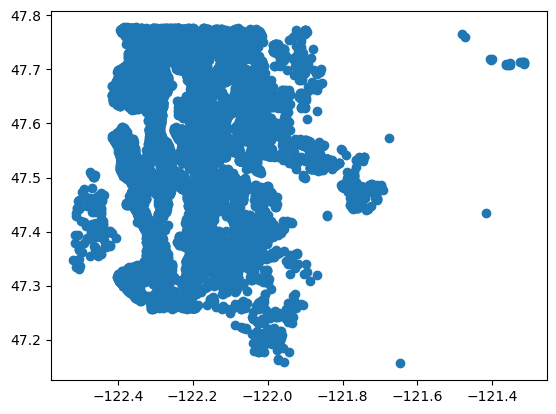

In [20]:
plt.scatter(x=df['long'],y=df['lat'] )
plt.show()  

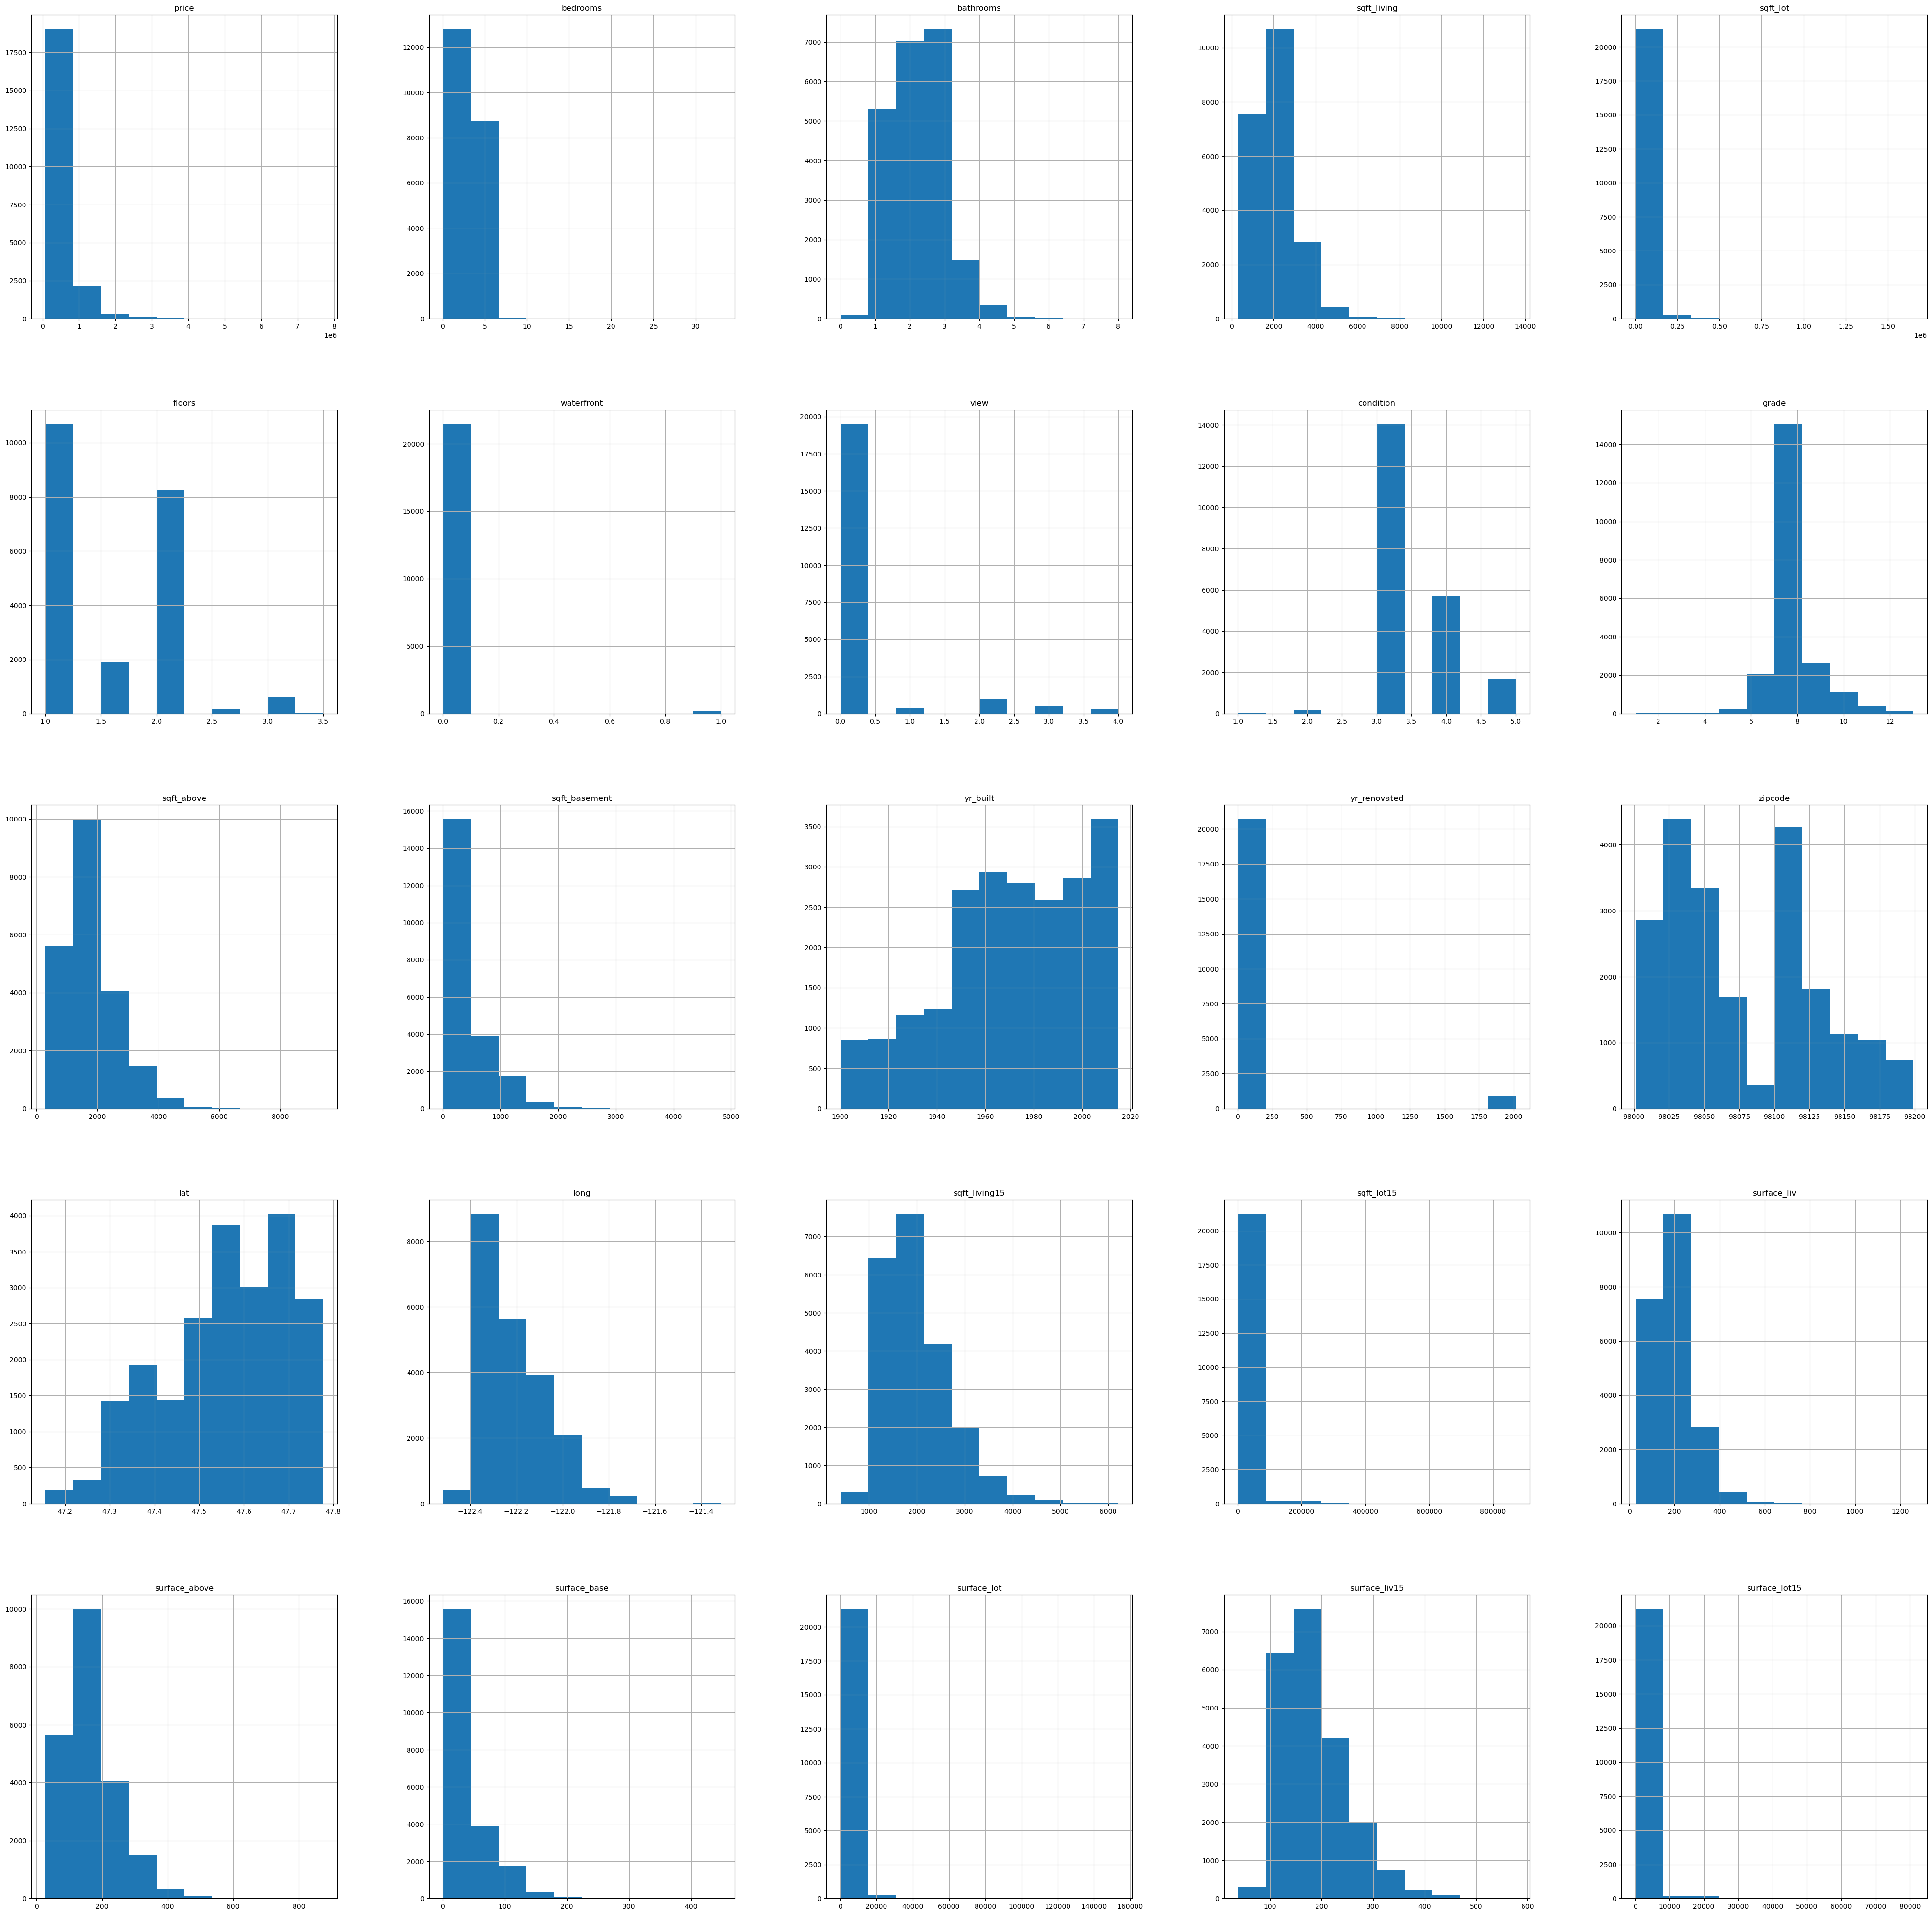

In [21]:
ax = df.hist(figsize=(50,50))

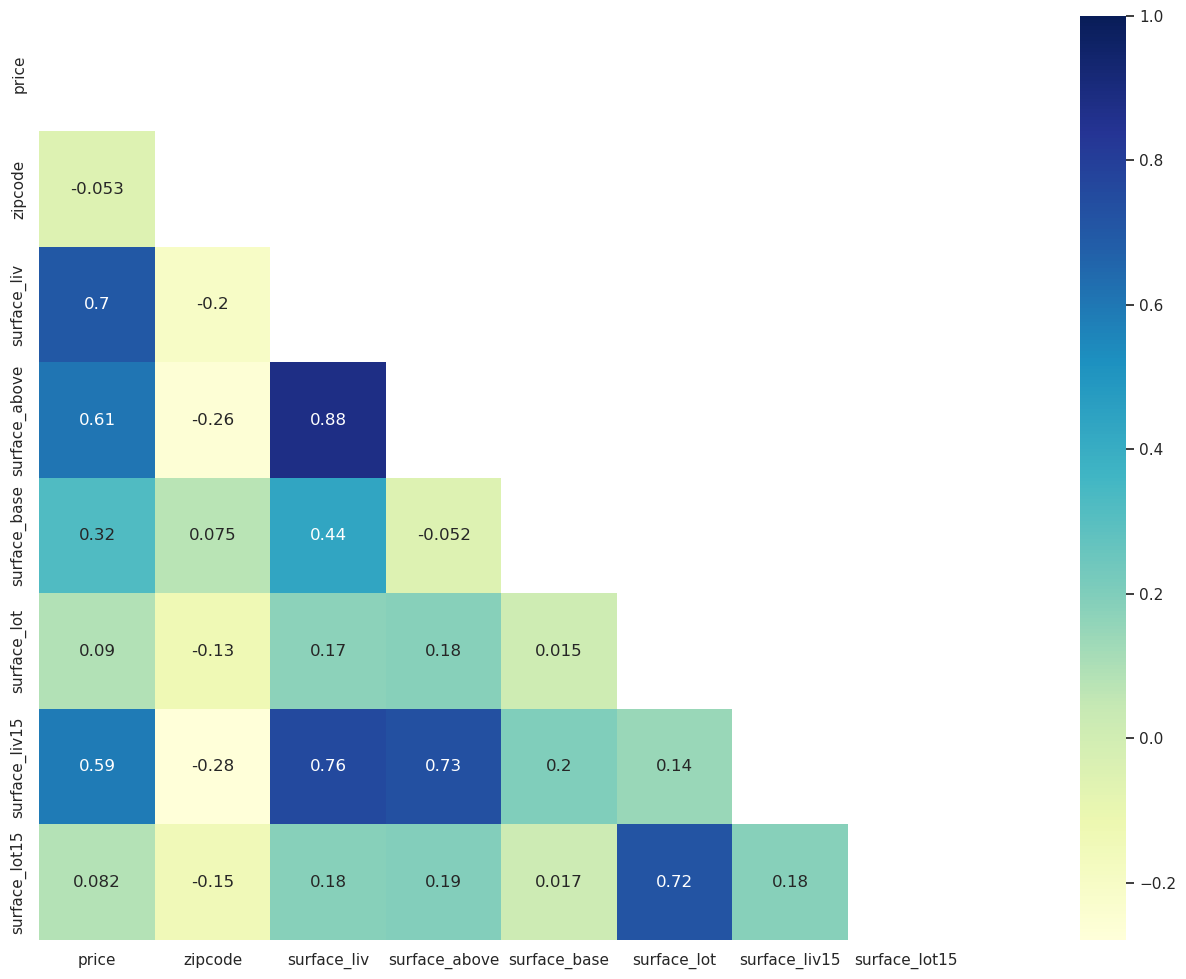

In [22]:
pearson = df.corr(method='pearson')
pearson = df.drop(['floors','waterfront','condition','lat','long', 'sqft_basement','view','sqft_above','bedrooms','bathrooms','sqft_lot','sqft_living','floors','sqft_living15','sqft_lot15','yr_built','yr_renovated','grade'],axis=1)
pearson = pearson.corr(method='pearson')
sns.set(rc={'figure.figsize':(30,12)})
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   ax = sns.heatmap(data=pearson, cmap="YlGnBu", mask=mask, vmax=1, annot=True, square=True)

In [23]:
df = df.join(pd.get_dummies(df['zipcode']))

In [24]:
df = df.drop('zipcode',axis=1)

In [25]:
df.corr().sort_values(by='price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,surface_liv,surface_above,surface_base,surface_lot,surface_liv15,surface_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,0.702035,0.605567,0.323816,0.089661,0.585379,0.082447,-0.092179,-0.080300,-0.076761,0.271131,0.065114,0.133695,0.017000,0.033076,-0.021621,-0.012927,-0.017478,-0.029577,-0.063943,-0.106093,0.006756,0.029201,-0.024350,0.024270,-0.072737,-0.073939,-0.059998,0.102556,-0.008077,-0.079044,0.212558,0.204873,-0.100370,-0.027857,0.047306,0.051974,-0.071979,-0.044925,-0.074489,-0.018858,-0.003985,-0.010617,0.009203,0.057207,0.088676,0.037372,-0.071805,0.068738,0.020670,0.090974,-0.075365,0.011848,-0.046801,0.065846,0.169842,0.036197,0.026641,0.016202,-0.051748,0.078085,0.029947,-0.026754,-0.040557,-0.063778,0.003507,0.018838,-0.057171,-0.035743,-0.046009,-0.022533,-0.091665,0.040507,-0.069242,-0.054409,-0.074025,0.083659
surface_liv,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,1.000000,0.876597,0.435043,0.172826,0.756420,0.183286,-0.025444,-0.047460,-0.018838,0.110143,0.055597,0.135177,0.009014,0.006716,0.004283,0.017994,0.003149,0.009399,-0.028202,-0.015093,0.017201,0.065982,0.005371,0.027314,-0.013995,-0.018294,-0.028389,0.046874,-0.017730,0.012370,0.090234,0.128564,-0.017147,-0.001779,0.051032,0.081399,-0.036019,-0.009462,-0.004833,0.052444,0.064547,-0.016105,0.035933,0.088939,0.132520,0.081364,0.016195,0.006074,-0.079079,0.007964,-0.080882,-0.060814,-0.038070,-0.001947,0.051198,-0.044344,-0.030713,-0.068433,-0.066414,-0.007495,-0.037440,-0.050630,-0.075353,-0.077507,-0.042668,-0.023200,-0.058010,-0.026280,-0.046354,-0.001424,-0.074719,0.028962,-0.042281,-0.024012,-0.041731,0.010880
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,1.000000,0.876597,0.435043,0.172826,0.756420,0.183286,-0.025444,-0.047460,-0.018838,0.110143,0.055597,0.135177,0.009014,0.006716,0.004283,0.017994,0.003149,0.009399,-0.028202,-0.015093,0.017201,0.065982,0.005371,0.027314,-0.013995,-0.018294,-0.028389,0.046874,-0.017730,0.012370,0.090234,0.128564,-0.017147,-0.001779,0.051032,0.081399,-0.036019,-0.009462,-0.004833,0.052444,0.064547,-0.016105,0.035933,0.088939,0.132520,0.081364,0.016195,0.006074,-0.079079,0.007964,-0.080882,-0.060814,-0.038070,-0.001947,0.051198,-0.044344,-0.030713,-0.068433,-0.066414,-0.007495,-0.037440,-0.050630,-0.075353,-0.077507,-0.042668,-0.023200,-0.058010,-0.026280,-0.046354,-0.001424,-0.074719,0.028962,-0.042281,-0.024012,-0.041731,0.010880
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248,0.762704,0.755923,0.168392,0.113621,0.713202,0.119248,-0.040117,-0.079011,-0.011113,0.106996,0.062591,0.148724,0.021211,-0.000310,-0.014899,0.009537,-0.017434,-0.011725,-0.044392,-0.010688,-0.006575,0.063147,-0.004465,0.077171,-0.022616,-0.026734,-0.033279,0.050971,-0.020587,-0.008589,0.077965,0.127567,-0.031792,-0.003588,0.075146,0.074013,-0.050169,-0.035572,-0.011757,0.029907,0.020648,-0.025380,0.039714,0.129276,0.149431,0.092108,0.021313,0.037380,-0.035508,0.015984,-0.084

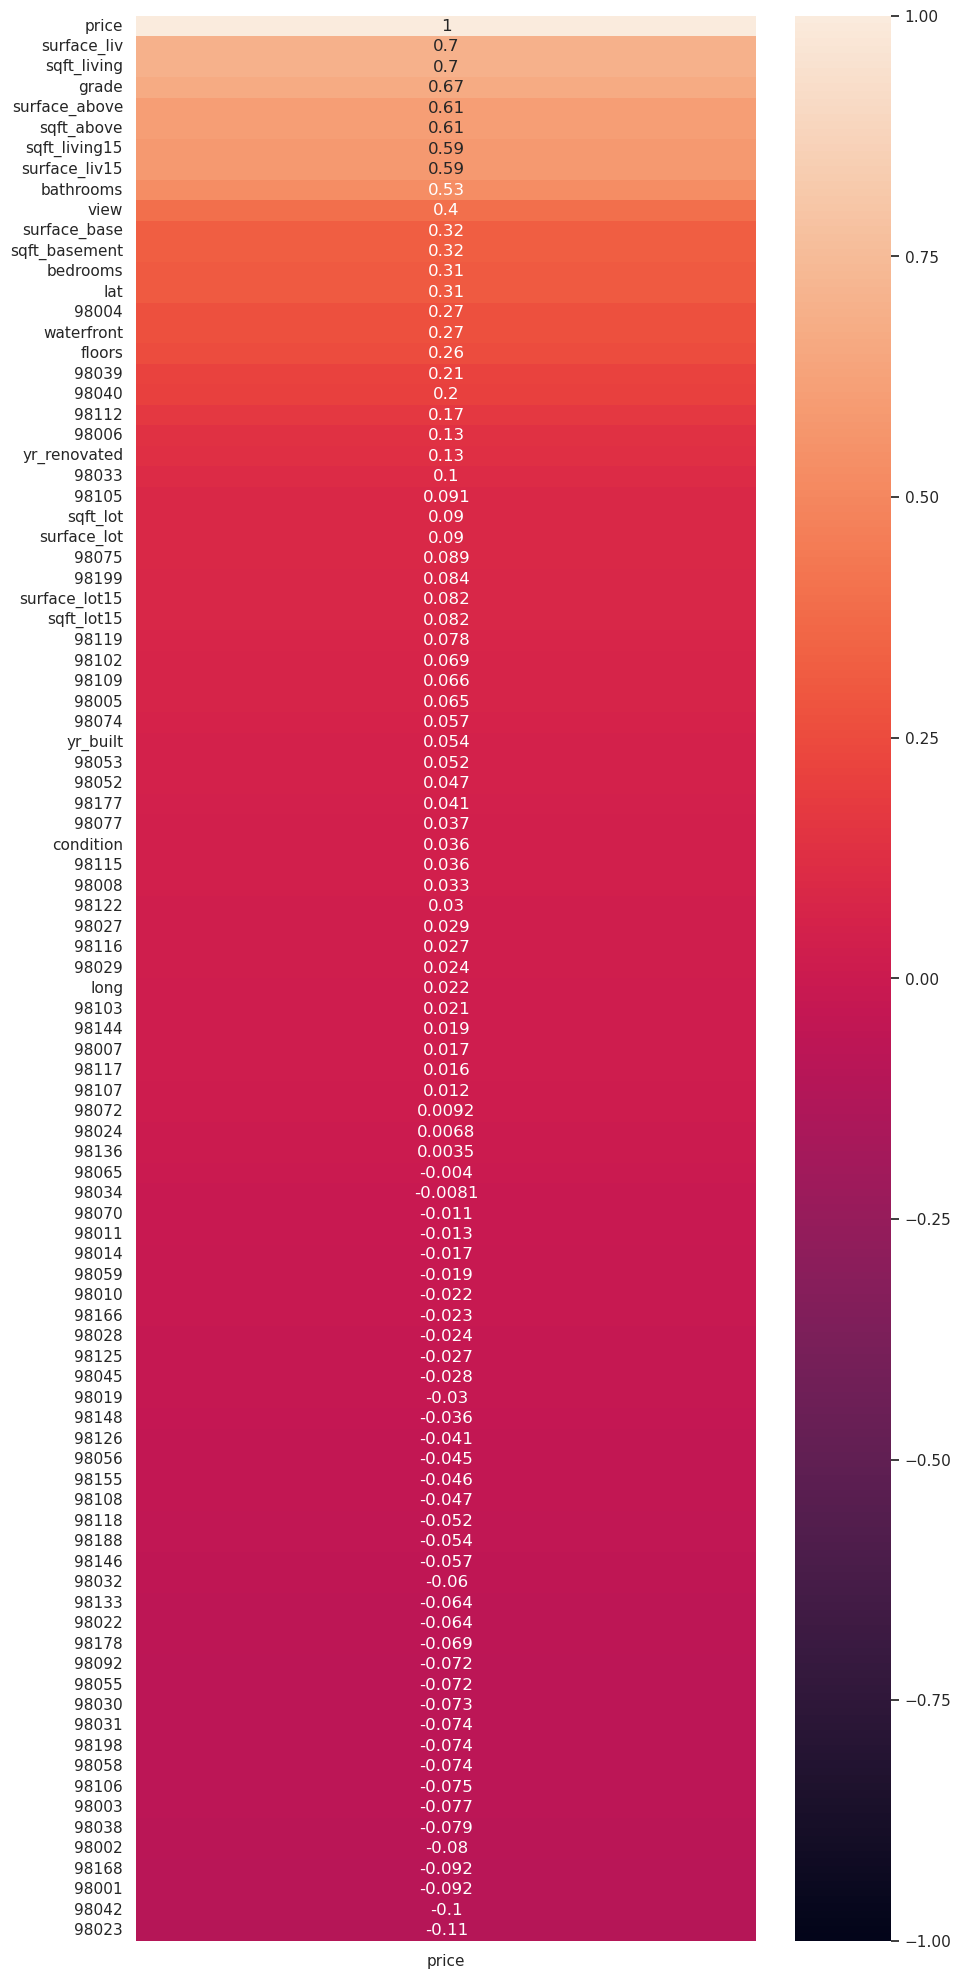

In [26]:
plt.figure(figsize=(10, 25))

heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True)


In [27]:
df.drop(df[df['bedrooms'] > 20].index, inplace= True)

In [28]:
df.loc[df['bathrooms'] <1]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,surface_liv,surface_above,surface_base,surface_lot,surface_liv15,surface_lot15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
208,180250.0,2,0.75,900,9600,1.0,0,0,3,6,900,0,1941,0,47.4604,-122.339,1250,14280,83.612700,83.612700,0.00000,891.868800,116.128750,1326.654840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
264,369900.0,1,0.75,760,10079,1.0,1,4,5,5,760,0,1936,0,47.4683,-122.438,1230,14267,70.606280,70.606280,0.00000,936.369337,114.270690,1325.447101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,299000.0,1,0.75,560,12120,1.0,0,0,3,4,560,0,1967,0,47.6750,-121.854,1300,19207,52.025680,52.025680,0.00000,1125.984360,120.773900,1784.387921,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,39.948290,39.948290,0.00000,469.160150,111.483600,696.772500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
569,405000.0,2,0.75,1160,15029,1.0,0,0,4,6,870,290,1937,0,47.6929,-121.870,1870,25346,107.767480,80.825610,26.94187,1396.239187,173.728610,2354.719438,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,245000.0,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,47.4810,-122.323,1170,15000,35.303140,35.303140,0.00000,1393.545000,108.696510,1393.545000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
875,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,47.6362,-122.322,2360,4000,284.654792,284.654792,0.00000,442.589892,219.251080,371.612000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1149,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,47.2638,-121.906,1160,42882,62.245010,62.245010,0.00000,4029.853431,107.767480,3983.866446,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1168,290000.0,2,0.75,440,8313,1.0,1,3,4,5,440,0,1943,0,47.4339,-122.512,880,26289,40.877320,40.877320,0.00000,772.302639,81.754640,2442.326967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1389,275000.0,1,0.75,1170,14149,1.0,0,0,5,7,880,290,1962,0,47.2653,-121.910,1130,24513,108.696510,81.754640,26.94187,1314.484547,104.980390,2277.331239,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df = df.drop('sqft_living',axis=1)
df = df.drop('sqft_lot',axis=1)
df = df.drop('sqft_lot15',axis=1)
df = df.drop('sqft_basement',axis=1)
df = df.drop('sqft_above',axis=1)
df = df.drop('sqft_living15',axis=1)

In [30]:
df.to_csv('df.csv',index=False)